In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('merged_data.csv')
df = df.drop(columns=['시점'])
df.head(), df.shape, df['지역별'].unique()


(  지역별  저출산율  고용률  학생수  사설학원수  사교육참여율  수술인원  인터넷이용률  근로시간  어린이집
 0  강원  1.60  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN
 1  경기  1.63  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN
 2  경남  1.59  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN
 3  경북  1.58  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN
 4  광주  1.64  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN,
 (5141, 10),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북', '충청'], dtype=object))

In [2]:
# 결측치
# df.isnull().sum()
df_copy = df.dropna()
df_copy.isnull().sum()

지역별       0
저출산율      0
고용률       0
학생수       0
사설학원수     0
사교육참여율    0
수술인원      0
인터넷이용률    0
근로시간      0
어린이집      0
dtype: int64

In [3]:
# object → int
from sklearn.preprocessing import LabelEncoder

le_disaster = LabelEncoder()
df_copy.loc[:, '지역별'] = le_disaster.fit_transform(df_copy['지역별'])
# df_copy['주택유형별'] = le_disaster.fit_transform(df_copy['주택유형별'])
# df_copy['주택규모별'] = le_disaster.fit_transform(df_copy['주택규모별'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 2448 to 4600
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     1936 non-null   object 
 1   저출산율    1936 non-null   float64
 2   고용률     1936 non-null   float64
 3   학생수     1936 non-null   float64
 4   사설학원수   1936 non-null   float64
 5   사교육참여율  1936 non-null   float64
 6   수술인원    1936 non-null   float64
 7   인터넷이용률  1936 non-null   float64
 8   근로시간    1936 non-null   float64
 9   어린이집    1936 non-null   float64
dtypes: float64(9), object(1)
memory usage: 166.4+ KB


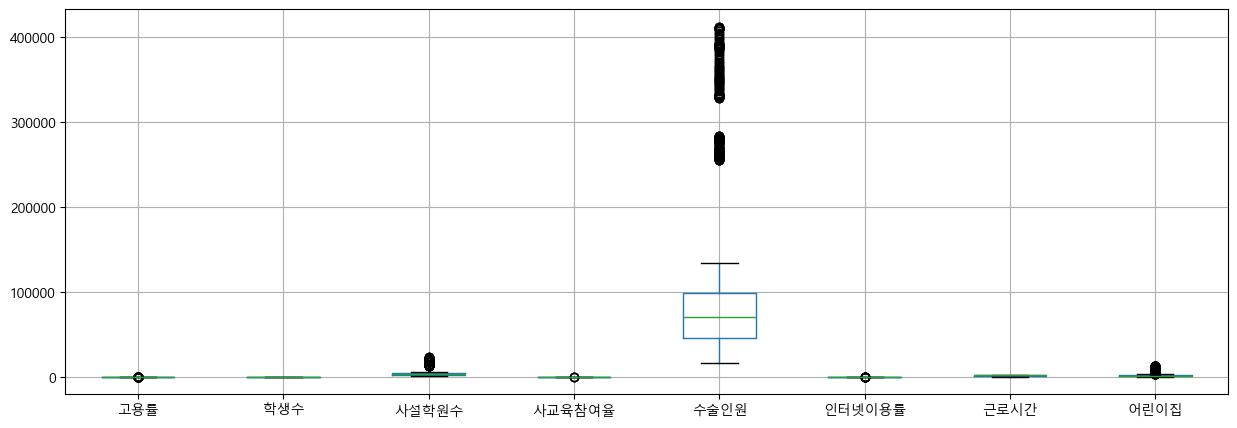

In [4]:
# 이상치 확인
import matplotlib.pyplot as plt

df_copy.drop('저출산율', axis=1).boxplot(figsize=(15,5))
plt.show()

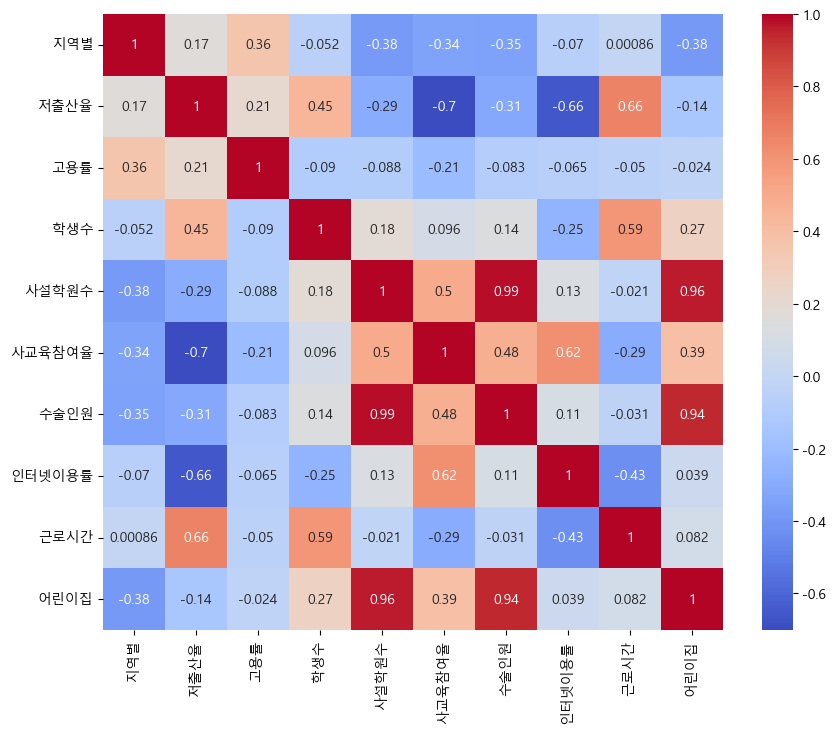

In [5]:
# 상관관계
import seaborn as sns

corr_mat = df_copy.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [6]:
# 왜도 확인
# df_copy.skew()

import numpy as np
df_copy.loc[:, '사설학원수'] = np.log1p(df_copy['사설학원수'])
df_copy.loc[:, '수술인원'] = np.log1p(df_copy['수술인원'])
df_copy.loc[:, '어린이집'] = np.log1p(df_copy['어린이집'])
df_copy.skew()

지역별            0.0
저출산율     -0.027285
고용률       0.486714
학생수       0.046954
사설학원수     0.905409
사교육참여율    0.096547
수술인원      0.508417
인터넷이용률   -0.809789
근로시간     -1.121811
어린이집      1.104827
dtype: object

In [7]:
select_df = df_copy[['사교육참여율', '인터넷이용률', '근로시간', '저출산율']]
select_df.head(), select_df.shape

(      사교육참여율  인터넷이용률    근로시간  저출산율
 2448    64.5    72.1  2011.2  1.37
 2449    70.9    83.1  1981.2  1.35
 2450    68.6    73.2  1983.6  1.50
 2451    67.6    69.0  1935.6  1.49
 2452    70.8    81.4  1964.4  1.29,
 (1936, 4))

In [8]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = select_df.drop(columns=['저출산율'])
y = select_df['저출산율']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index: 0, Column Name: 사교육참여율
Index: 1, Column Name: 인터넷이용률
Index: 2, Column Name: 근로시간


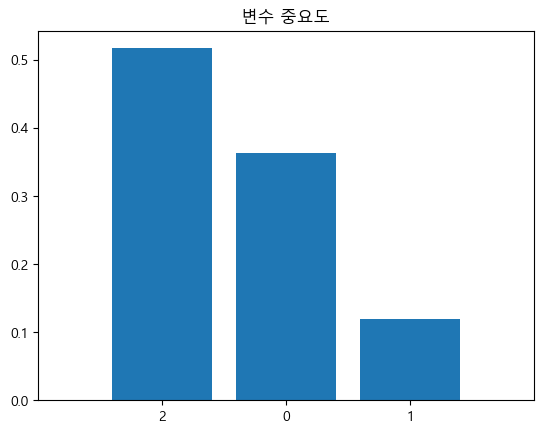

In [9]:
# 변수 중요도 확인
from sklearn.ensemble import RandomForestRegressor

for index, column in enumerate(X.columns):
    print(f'Index: {index}, Column Name: {column}')

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('변수 중요도')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 모델 훈련
# from sklearn.linear_model import LassoCV
# model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
# model.fit(X_train_scaled, y_train)
# print(model.alpha_)

# # 훈련:73%, 테스트:75%, mse:0.012, r2:75%
# from sklearn.linear_model import Lasso
# model = Lasso(alpha=0.01)

# # # 훈련:73%, 테스트:76%, mse:0.011, r2:76%
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# # 훈련:73%, 테스트:76%, mse:0.011, r2:76%
# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)

# # 훈련:72%, 테스트:75%, mse:0.012, r2:75%
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=0.1, l1_ratio=0.1)

# # DecisionTreeRegressor = 훈련:100%, 테스트:92%, mse:0.003, r2:92%
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

# RandomForestRegressor = 훈련:99%, 테스트:94%, mse:0.002, r2:94%
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150)

# # GradientBoostingRegressor = 훈련:90%, 테스트:88%, mse:0.005, r2:88%
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()

# # MLPRegressor = 훈련:73%, 테스트:74%, mse:0.012, r2:74%
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [12]:
# 훈련 정확도
train_acc = model.score(X_train_scaled, y_train)
train_acc

0.9917802456060504

In [13]:
# 테스트 정확도
test_acc = model.score(X_test_scaled, y_test)
test_acc

0.9475857562323051

In [14]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

0.002625690504009153

In [15]:
# r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
r2

0.9475857562323051